# CS530 - Principles of AI 
### Roshan Patel
Assignment 1  
2017-10-03


In [1]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));

This jupyter notebook was executed with:
3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]


## Problem Statement

Solve the following discrimination problem analytically and then write a program to input 100 data points sampled from each class distribution (using a random number generator), classifying them,  and computing the empirical error rate for each class, together with the average error rate for both classes using 
1. the training sample as the testing sample; and then using   
2. a leaving-one-out method comparing the following types of classifiers:  
    a. Naive Bayesian Classifier  
    b) One layer ANN

Two features:  N(mean,variance) = Normal distribution of variable with mean and variance as indicated for the specified parameters

P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)

P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)

P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)

P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)

Under three very different assumptions about the prior probabilities of w1 and w2:

A. Class 1 P(w<sub>1</sub>)  = 0.9 and Class 2 P(w<sub>2</sub>) = 0.1  
B. Class 1 P(w<sub>1</sub>) =  0.1 and Class 2 P(w<sub>2</sub>) = 0.9  
C. Class 1 P(w<sub>1</sub>) = 0.5 and Class 2 P(w<sub>2</sub>) = 0.5  


Graph the analytic solution and superimpose for both discriminants the results for the 200 points of both classes so as to show the differences in results for the two types of classifiers and the three variations in prior probabilities. Plot the error rate estimates for both types of estimates for the three types of error rates (individual classes and average) separately so as to show the contrasts there.

Choose carefully how you summarize both graphically and in writing the comparisons so as to show the contrast between the different results.

Explain in a long paragraph or half a page what this simple analytical example demonstrates for practical prediction problems

 



---

# Introduction

This assignment asks us to explore two supervised learning methods for building classifiers: bayesian decision theory and single layer artificial neural networks (ANN). 

## Bayesian Decision Theory 

Naive bayes theory assumes that all features are IID (independent and identically distributed) random variables.  We assume that each feature is mutually independent and sampling the feature from a population will yield a Gaussian distribution (central limit theorem).  We also assume that the variances of each of the features are mutually independent of one another.
  
This kind of assumption makes the application of bayesian learning model practical. 

To make decisions, we use the following rule: 


if ( $P( w_1 | x)  >   P( w_2 | x)$ ):     
    &emsp;classify as w_1  
else:   
    &emsp;classify as w_2  


Thus, assuming that each feature's distribution is normally distributed, we can obtain these posterior probabilities using bayes' rule.  The conditional probability (P (x | w<sub>i</sub>)) can be estimated using the Gaussian function.  

This method will perform the best if the the assumptions are closely met and the data is linearly separable.  


## Single Layer ANN 

A single layer ANN is a perceptron (Rosenblatt).  The perceptron algorithm starts by assuming weights on a linear classifier that is a function of the features.  The classifier is an activation function over a weighted linear function.  The perceptron will adjust the weights given test samples.  If the test sample is classified correctly by the current discrimination function, do nothing.  If it is misclassified, adjust the weights in order to skew the discrimination function towards correcting the error.  To train a perceptron, multiple passes over the training data is helpful.  

Rosenblatt's perceptron utilized a unit-step-function as its activation function.  Modern methods utilize more logistic functions in it's place to allow for weight-updates of multiple layers.   

To make decisions, the perceptron uses the following rule (after trained):

if ( weighted_function(x) > threshold):   
    &emsp;classify as w1 (+1)  
else:   
    &emsp;classify as w2 (-1)  

Similar to the Bayesian model, a perceptron will function most effectively if the data is linearly separable. 

# Solving Analytically 

The given information:   

P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)  
P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)  
P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)  
P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)  

With three separate cases of prior probabilities:   
A. Class 1 P(w<sub>1</sub>)  = 0.9 and Class 2 P(w<sub>2</sub>) = 0.1  
B. Class 1 P(w<sub>1</sub>) =  0.1 and Class 2 P(w<sub>2</sub>) = 0.9  
C. Class 1 P(w<sub>1</sub>) = 0.5 and Class 2 P(w<sub>2</sub>) = 0.5  







## Bayesian 

The decision rule requires us to determine the posterior probabilities of a class given input features.  
Using Baye's rule: 

<div align='center'>
$
P(w_k | x_i) = \frac{P(x_i | w_k )P(w_k)}{P(x_i)} 
$
</div>

With our case of two features: 

<div align='center'>
$ \begin{align}
P(w_k | x_1 x_2) = \frac{P(x_1 x_2 | w_k )P(w_k)}{P(x_1 x_2)} \\
P(w_k | x_1 x_2) = \frac{P(x_1 | w_k )(x_2 | w_k )P(w_k)}{P(x_1)P(x_2)} 
\end{align}
$
</div>

Comparing features for two classes:   

<div align='center'>
$\begin{align}
P(w_1 | x_1 x_2) = \frac{P(x_1 | w_1 )(x_2 | w_1 )P(w_1)}{P(x_1)P(x_2)}  \\
P(w_2 | x_1 x_2) = \frac{P(x_1 | w_2 )(x_2 | w_2 )P(w_2)}{P(x_1)P(x_2)} 
\end{align}
$
</div>

The bayesian decision rule.  The the following expression is true, choose $w_1$: 

<div align='center'>
$\begin{align}
P(w_1 | x_1 x_2) = \frac{P(x_1 | w_1 )(x_2 | w_1 )P(w_1)}{P(x_1)P(x_2)}  >
P(w_2 | x_1 x_2) = \frac{P(x_1 | w_2 )(x_2 | w_2 )P(w_2)}{P(x_1)P(x_2)} 
\end{align}
$
</div>


We notice here that the expression can be simplified of the evidence probabilties.  
<div align='center'>
$\begin{align}
P(w_1 | x_1 x_2) = P(x_1 | w_1 )(x_2 | w_1 )P(w_1)  >
P(w_2 | x_1 x_2) = P(x_1 | w_2 )(x_2 | w_2 )P(w_2) 
\end{align}
$
</div>





### A.

Subtitution gives us:

<div align='center'>
$\begin{align}
0.9 * N(x_1, 0, 1) * N(x_2, 0, 1) > 0.1 * N(x_1, 1, 2) * N(x_2, 1, 2)
\end{align}
$
</div>

where $N(x, \mu, \sigma)$ is the gaussian normal distribution function. 
 
<div align='center'>
$\begin{align}
N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{(-(x-\mu)^2 / 2\sigma^2)}
\end{align}
$
</div>


### B 

In a similar method: 
<div align='center'>
$\begin{align}
0.1 * N(x_1, 0, 1) * N(x_2, 0, 1) > 0.9 * N(x_1, 1, 2) * N(x_2, 1, 2)
\end{align}
$
</div>

### C 
The prior probabilities cancel out in this case.   

<div align='center'>
$\begin{align}
N(x_1, 0, 1) * N(x_2, 0, 1) > N(x_1, 1, 2) * N(x_2, 1, 2)
\end{align}
$
</div>

---

From my observing the distributions of the conditional probabilties, the state of nature for the two features against the two classes is not clearly linearly separable.  The means are very close together and the variance of the second class across both features causes the distributions to span out, overlapping with the feature distributions of class 1.  

Class 2's data points will generally be more to the top right of a plot where the axes are $(x_1, x_2)$.  The class 1 points will be emcompassed within class 2, except more centered around $(x_1, x_2) = (1, 1)$ with smaller variance.

In situation A, the prior probability of class 1 is much larger than that of class 2.  That means that it naturally occurs in nature more often, and a sample set will contain more of class 1.  The resulting data set will cause our Bayesian learner to be more lenient towards classifying a random point as class 1 than if the priors were equal.  

In B, the priors are swapped from A.  The classifier will have the opposite behavior.  Since the variance of the second class covers that of class 1, it is possible that the class 1 points will be underpowered completely and the classifer may categorize all points as class 2.

C gives equal priors.  Thus the Bayesian classifier will likely draw a circle around the points emcompassing class 1 around its mean.  The points outside of this bubble will be classified as class 2. 

## Single ANN

The single ANN will be strongly influenced by the frequency it sees data points of class 1 and class 2 in the training set.

### A 
With more sample points belonging to class 1 than in class 2, the linear discriminate function that the perceptron deduces will be more in favor of classifying all new points as class 1 than as class 2.  In a plot, this is appear as the decision boundary appearing farther up (where x_1 and x_2 values are higher) than if the priors were equal.  More class 2 points in the training set will be misclassified by the boundary than class 1 points.

### B
Reserving the priors would leave the perceptron to significantly disregard the class 1 points.  The class 2 points will overpower the class 1 points, and the decision boundary is likely to appear very low and to the left (where x_1 and x_2 values are lower).  It is possible that all class 1 points will be misclassified.


### C
Equal priors will yield a discriminate function that is a balance of the two cases above.  It is expected that about half of each class will be incorrectly classified.


# Test program 

The following is a small test program that will construct the hypothetical situation described by the probabilities, sample a set of points from it, and train on them.

We will first take a simpler, more trivial situation in which the two classes are very obviously linearly separable in order to ensure our classifiers are working properly.  Then we will take the same algorithms to the problem.



## Building and verifying the learner models  

A sample distribution of 200 points (100 per class) will be generated using the numpy.random package's uniform distribution sampler.  We will use mean and variances for the conditional probabilties such that there exists a hyperplane that separates the classes

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def generate_sample_set(mu, variance, priors):
    uniform_rands = [np.zeros(4)]*4

    for i in range(4):
        if i in (0, 2):
            set_size = SAMPLE_SET_SIZE*priors[0]
        else: 
            set_size = SAMPLE_SET_SIZE*priors[1]
            
        uniform_rands[i] = np.random.normal(mu[i], np.sqrt(variance[i]), int(set_size)) 

        headers = "x1 x2 class".split()
    class1 = pd.DataFrame({'x1': uniform_rands[0], 'x2': uniform_rands[2], 
                          'class': 'w1'}, columns=headers)
    class2 = pd.DataFrame({'x1': uniform_rands[1], 'x2': uniform_rands[3], 
                          'class': 'w2'}, columns=headers)
    class2.index=class2.index+int(SAMPLE_SET_SIZE/2)

    return pd.concat([class1, class2])


Random numbers are sampled using the numpy normal distribution random number generator.  We will disregard the effects of using a pseudo-random number generator.

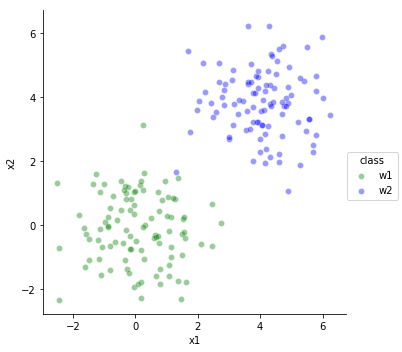

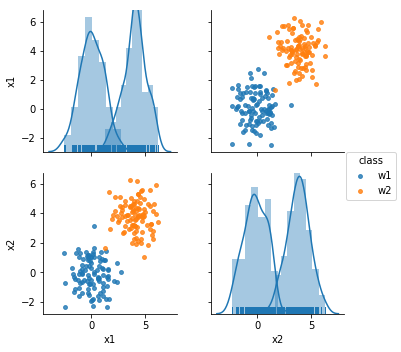

In [4]:
# Linearly separable sample set  
SAMPLE_SET_SIZE = 200
mu = [0, 4, 0, 4]
variance = [1, 1, 1, 1]
priors = [0.5, 0.5]

sample_set = generate_sample_set(mu, variance, priors)

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()

g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             



The plot above shows the fake sampled data.  There are 200 points, half of which belong to class w1 and the other half belong to class w2.  Again, this experiment set is clearly linearly separable and will be a good test for our two methods.  The bottom plots show a rough estimated distribution for each class plotted against the features.

## Naive Bayesian Classifier 

The following is a class that computes all the operations needed for the bayesian decision rule.  The class itself will store the training set, but the only values the classifier requires after training are the parameters to the decision rule expression.  

In [5]:
class BayesianClassifier():
    
    def __init__(self):
        return 

        
    def train_on_sample(self, df):
        self.df = df
        self.df_class1 = df.loc[df['class'] == 1]
        self.df_class2 = df.loc[df['class'] == -1]

        self.set_stats(df)
        return
    
    def set_stats(self, df):
        stats = self.df.describe()
        stats1 = self.df_class1.describe()
        stats2 = self.df_class2.describe()
        
        self.x1w1_mean = stats1['x1'].get('mean')
        self.x1w1_std = stats1['x1'].get('std')

        self.x1w2_mean = stats2['x1'].get('mean')
        self.x1w2_std = stats2['x1'].get('std')

        self.x2w1_mean = stats1['x2'].get('mean')
        self.x2w1_std = stats1['x1'].get('std')
        
        self.x2w2_mean = stats2['x2'].get('mean')
        self.x2w2_std = stats2['x1'].get('std')
        
        self.prior_w1 = df['class'].value_counts()[1] / stats['class'].get('count') 
        self.prior_w2 = df['class'].value_counts()[-1] / stats['class'].get('count')
        return 

    
    def cond_prob_gaussian(self, x, mu, sig):
        A = (1 / (np.sqrt(2*np.pi*sig**2)))
        B = np.exp(-0.5 * ((x - mu)/sig)**2)        
        return A*B
    

    def conditional_prob_x1w1(self, x1):
        return self.cond_prob_gaussian(x1, self.x1w1_mean, self.x1w1_std)

    def conditional_prob_x1w2(self, x1):
        return self.cond_prob_gaussian(x1, self.x1w2_mean, self.x1w2_std)

    
    def conditional_prob_x2w1(self, x2):
        return self.cond_prob_gaussian(x2, self.x2w1_mean, self.x2w1_std)
        
    def conditional_prob_x2w2(self, x2):
        return self.cond_prob_gaussian(x2, self.x2w2_mean, self.x2w2_std)
  
    def predict(self, X):
        
        posterior_w1 = self.prior_w1 * self.conditional_prob_x1w1(X[0]) * self.conditional_prob_x2w1(X[1])
        posterior_w2 = self.prior_w2 * self.conditional_prob_x1w2(X[0]) * self.conditional_prob_x2w2(X[1])
        
        if(posterior_w1 >= posterior_w2):
            return 1
        else: 
            return -1

def generate_bayes_plot_data(lower, upper, numpoints, bae):
    b = np.linspace(lower, upper, numpoints)
    c = np.zeros((b.size, b.size))
    headers = "x1 x2 class".split()
    df = pd.DataFrame({}, columns=headers)

    for idx, i in enumerate(b):
        for idj, j in enumerate(b):
            dicttemp = {'x1': i, 'x2':j, 'class':bae.predict([i, j])}
            temp = pd.DataFrame(dicttemp, columns=headers, index=[idx*idj+idj])

            df = pd.concat([df, temp])
            
    return df

The following will create an instance of the bayesian classifier and have it train on the linearly separable sample set defined above.

In [6]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

bae = BayesianClassifier()
bae.train_on_sample(training_set)


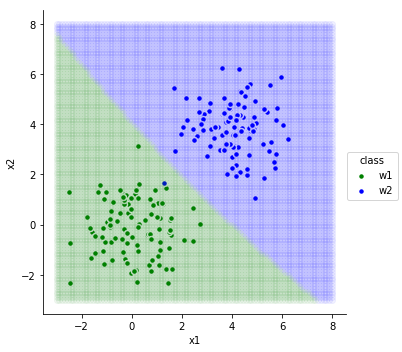

In [7]:
bayesplotdf = generate_bayes_plot_data(-3, 8, 100, bae)

class1 = bayesplotdf.loc[bayesplotdf['class']==1]
class2 = bayesplotdf.loc[bayesplotdf['class']==-1]

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)

g.add_legend()


The plot above shows the decision boundary learned by the bayesian algorithm.  It is very efficient and performs very well over the separable training data.

Let's move onto creating the single layer ANN using the same linearly separable sample data.

## Single Layer ANN

The following is a class definition for the single layer ANN (perceptron).  It also stores the training data within it, but following learning, the only information it requires to make predictions is the weight vector.  

In [8]:
# Implementing single layer ANN class
# Simple perceptron learning rule using a unit-step function for each neuron's activation function 

class singleLayerANN(object):
    
    def __init__(self, learning_rate=0.1, cycles=50):
        self.learning_rate = learning_rate
        self.cycles = cycles

        
    def train_on_sample(self, X, omega, cost):
        
        self.w_ = np.zeros(X.shape[1] + 1)
        self.error = []
        self.misclass1 = 0
        self.misclass2 = 0
        self.correct1 = 0
        self.correct2 = 0
        
        for _ in range(self.cycles):
            cycle_error = 0

            
            for x_i, target in zip(X, omega):
                deltaWeight = self.learning_rate * (target - self.predict(x_i))
                
                
                if(deltaWeight != 0.0 and target == 1):
                    # Guessed class 2, target was class 1
                    self.w_[1:] += deltaWeight * x_i * cost[0]
                    self.w_[0] += deltaWeight * cost[0]
                    self.misclass1 += 1
                elif(deltaWeight != 0.0 and target == -1):
                    # Guessed class 1, target was class 2
                    self.w_[1:] += deltaWeight * x_i * cost[1]
                    self.w_[0] += deltaWeight * cost[1]
                    self.misclass2 += 1
                elif(deltaWeight == 0.0 and target == 1):
                    # Guessed class 1 correctly 
                    self.correct1 += 1
                elif(deltaWeight == 0.0 and target == -1):
                    # Guessed class 2 correctly 
                    self.correct2 += 1
                else:
                    self.w_[1:] += deltaWeight * x_i
                    self.w_[0] += deltaWeight 
                    self.correct += 1
                
                cycle_error += int(deltaWeight != 0.0)
            
            self.error.append(cycle_error)
    
        return self
    
    
    def predict(self, X):
        return np.where(self.linear_sum(X) >= 0.0, 1, -1)
        
        
    def linear_sum(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        

Now, lets generate an instance of the learner and apply the test data. 

In [9]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

X = training_set.iloc[0:SAMPLE_SET_SIZE+1, [0, 1]].values
omega = training_set.iloc[0:SAMPLE_SET_SIZE+1, 2].values

LEARNING_RATE = 0.1
CYCLES = 10
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [1, 1]

slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
slANN.train_on_sample(X=X, omega=omega, cost=errcost)


The resulting weight vector: [ 2.6        -1.08045853 -1.00070611]


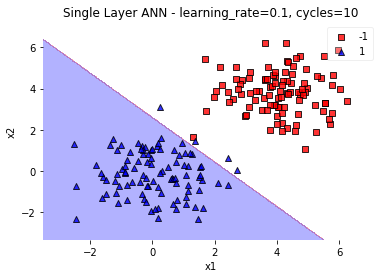

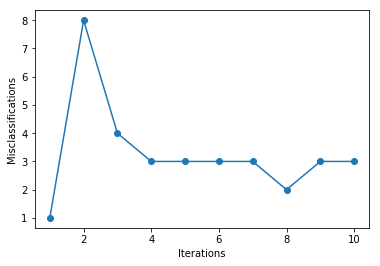

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

print("The resulting weight vector: {0}".format(slANN.w_))

plot_decision_regions(X, omega, clf=slANN)
plt.title('Single Layer ANN - learning_rate={0}, cycles={1}'.format(LEARNING_RATE, CYCLES))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(1, len(slANN.error)+1), slANN.error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()



As can be seen above, the perceptron learner also performs very well against the linearly separable data.  In just 5 iterations, it has completely fitted the training set and will likely perform well against test sets.  

--- 

Now that the learners are verified to operate well enough on easily classifiable data, lets move onto the problem

## A 
P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)  
P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)  
P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)  
P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)  

Class 1 P(w<sub>1</sub>)  = 0.9 and Class 2 P(w<sub>2</sub>) = 0.1  

The following will generate 200 points from the state of nature described by the probabilities above.


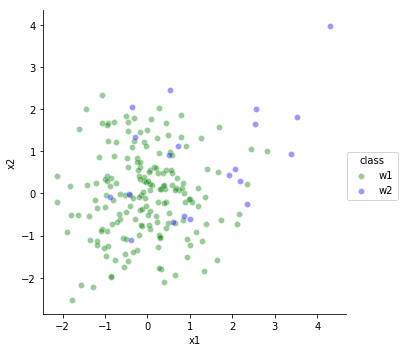

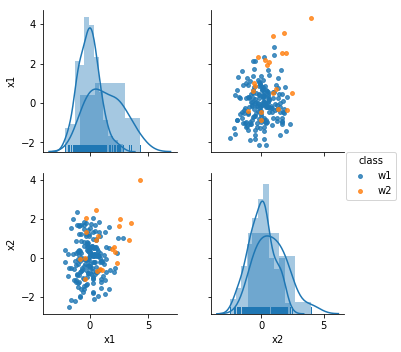

In [11]:
# Case A sample set
SAMPLE_SET_SIZE = 200
mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
priors = [0.9, 0.1]


sample_set = generate_sample_set(mu, variance, priors)

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()

g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


### Bayesian Learner

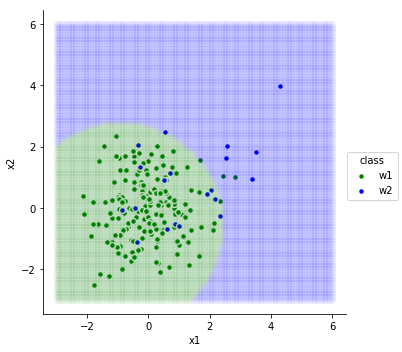

In [12]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

bae = BayesianClassifier()
bae.train_on_sample(training_set)

bayesplotdf = generate_bayes_plot_data(-3, 6, 100, bae)

class1 = bayesplotdf.loc[bayesplotdf['class']==1]
class2 = bayesplotdf.loc[bayesplotdf['class']==-1]

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)
g.add_legend()


### single layer ANN learner

The resulting weight vector: [-0.2        -0.18681003 -0.26811842]


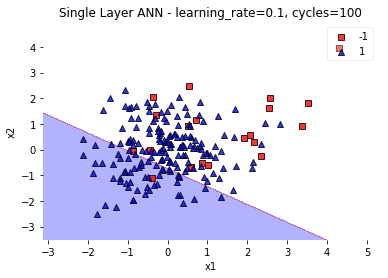

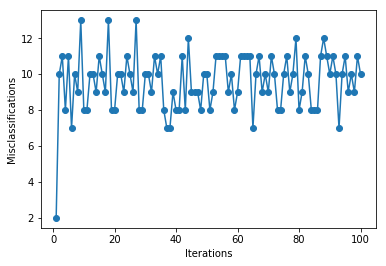

In [13]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

X = training_set.iloc[0:SAMPLE_SET_SIZE+1, [0, 1]].values
omega = training_set.iloc[0:SAMPLE_SET_SIZE+1, 2].values

LEARNING_RATE = 0.1
CYCLES = 100
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [1, 1]

slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
slANN.train_on_sample(X=X, omega=omega, cost=errcost)

print("The resulting weight vector: {0}".format(slANN.w_))

plot_decision_regions(X, omega, clf=slANN)
plt.title('Single Layer ANN - learning_rate={0}, cycles={1}'.format(LEARNING_RATE, CYCLES))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(1, len(slANN.error)+1), slANN.error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


### Comparison
Let's superimpose the two classifiers.

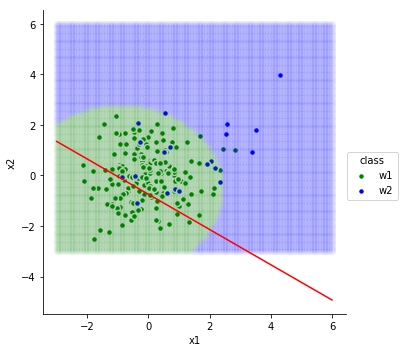

In [14]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)
g.add_legend()


A = slANN.w_[0]
B = slANN.w_[1]
C = slANN.w_[2]

pies = np.linspace(-3, 6) 
skies = (A + B*pies)/(-C)
plt.plot(pies, skies, 'r-')


**DISCUSS THE DIFFERENCE**

## B 
P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)  
P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)  
P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)  
P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)  

Class 1 P(w<sub>1</sub>)  = 0.1 and Class 2 P(w<sub>2</sub>) = 0.9  

The following will generate 200 points from the state of nature described by the probabilities above.


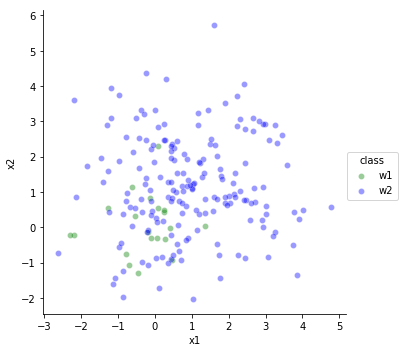

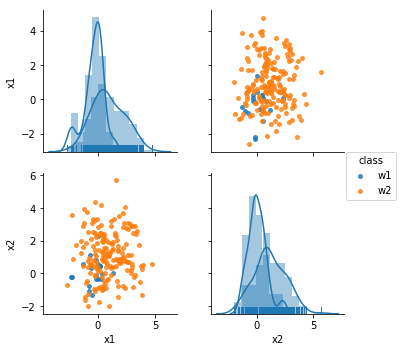

In [15]:
# Case B sample set
SAMPLE_SET_SIZE = 200
mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
priors = [0.1, 0.9]


sample_set = generate_sample_set(mu, variance, priors)

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()

g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


### Bayesian Learner

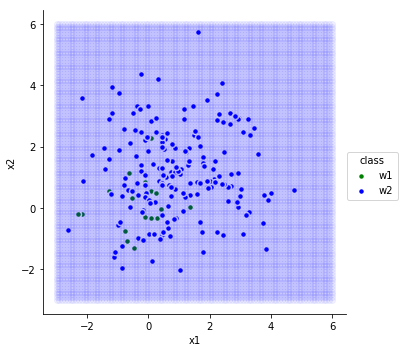

In [16]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

bae = BayesianClassifier()
bae.train_on_sample(training_set)

bayesplotdf = generate_bayes_plot_data(-3, 6, 100, bae)

class1 = bayesplotdf.loc[bayesplotdf['class']==1]
class2 = bayesplotdf.loc[bayesplotdf['class']==-1]

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)

g.add_legend()


### single ANN Learner

The resulting weight vector: [-0.08        0.00718408 -0.02069666]


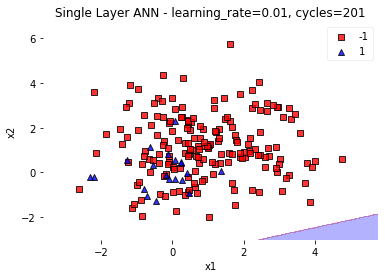

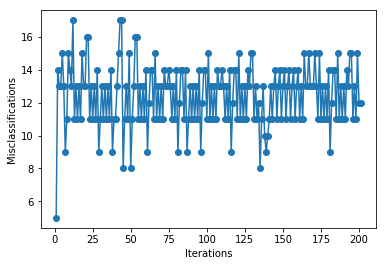

In [17]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

X = training_set.iloc[0:SAMPLE_SET_SIZE+1, [0, 1]].values
omega = training_set.iloc[0:SAMPLE_SET_SIZE+1, 2].values

LEARNING_RATE = 0.01
CYCLES = 201
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [1, 1]

slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
slANN.train_on_sample(X=X, omega=omega, cost=errcost)

print("The resulting weight vector: {0}".format(slANN.w_))

plot_decision_regions(X, omega, clf=slANN)
plt.title('Single Layer ANN - learning_rate={0}, cycles={1}'.format(LEARNING_RATE, CYCLES))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(1, len(slANN.error)+1), slANN.error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


### comparison
Superimpose the classifiers

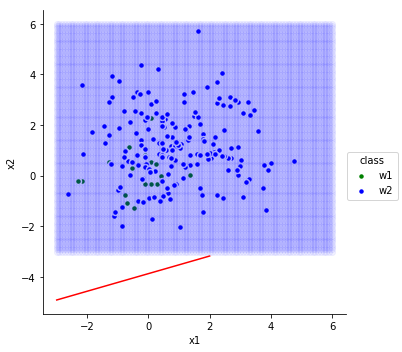

In [18]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)
g.add_legend()


A = slANN.w_[0]
B = slANN.w_[1]
C = slANN.w_[2]

pies = np.linspace(-3, 2) 
skies = (A + B*pies)/(-C)
plt.plot(pies, skies, 'r-')


## C 
P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)  
P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)  
P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)  
P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)  

Class 1 P(w<sub>1</sub>)  = 0.5 and Class 2 P(w<sub>2</sub>) = 0.5  

The following will generate 200 points from the state of nature described by the probabilities above.


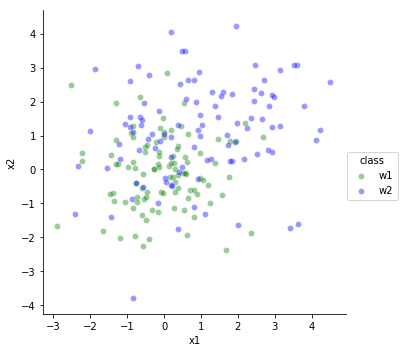

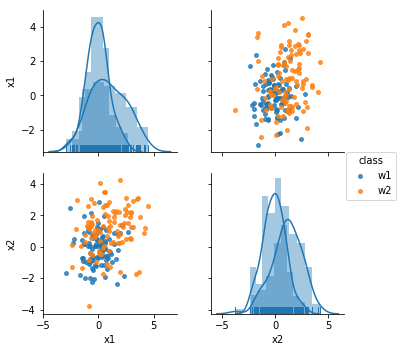

In [65]:
# Case A sample set
SAMPLE_SET_SIZE = 200
mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
priors = [0.5, 0.5]


sample_set = generate_sample_set(mu, variance, priors)

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()

g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


### bayesian learner

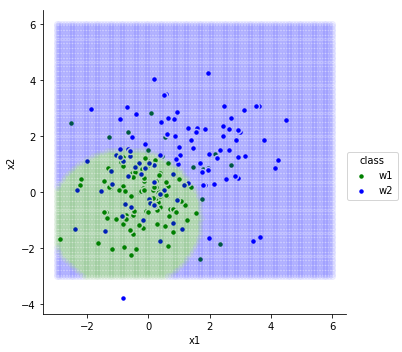

In [66]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

bae = BayesianClassifier()
bae.train_on_sample(training_set)

bayesplotdf = generate_bayes_plot_data(-3, 6, 100, bae)

class1 = bayesplotdf.loc[bayesplotdf['class']==1]
class2 = bayesplotdf.loc[bayesplotdf['class']==-1]

colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)

g.add_legend()


### single layer ANN

The resulting weight vector: [-1.2        -0.02470036 -0.50464587]


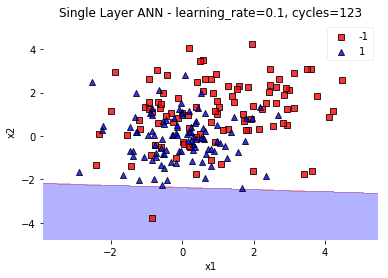

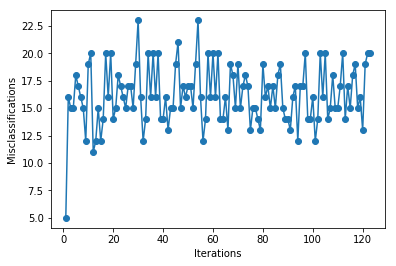

In [67]:
# Replace the class string with integer values (1 for class omega_1 and -1 for class omega_2)
training_set = pd.DataFrame.copy(sample_set)
training_set['class'] = training_set['class'].replace('w1', 1)
training_set['class'] = training_set['class'].replace('w2', -1)

X = training_set.iloc[0:SAMPLE_SET_SIZE+1, [0, 1]].values
omega = training_set.iloc[0:SAMPLE_SET_SIZE+1, 2].values

LEARNING_RATE = 0.1
CYCLES = 123
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [1, 1]

slANN = singleLayerANN(learning_rate=LEARNING_RATE, cycles=int(CYCLES))
slANN.train_on_sample(X=X, omega=omega, cost=errcost)

print("The resulting weight vector: {0}".format(slANN.w_))

plot_decision_regions(X, omega, clf=slANN)
plt.title('Single Layer ANN - learning_rate={0}, cycles={1}'.format(LEARNING_RATE, CYCLES))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.plot(range(1, len(slANN.error)+1), slANN.error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()


### comparison


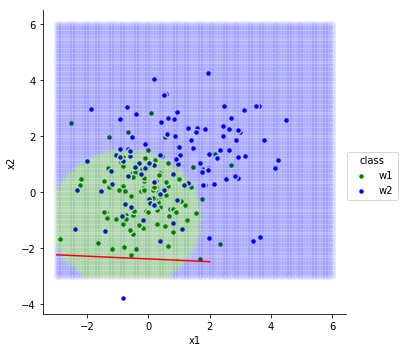

In [68]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=1, linewidth=1.5, edgecolor='white')
plt.plot(class1['x1'], class1['x2'], 'go', alpha=0.05)
plt.plot(class2['x1'], class2['x2'], 'bo', alpha=0.05)
g.add_legend()


A = slANN.w_[0]
B = slANN.w_[1]
C = slANN.w_[2]

pies = np.linspace(-3, 2) 
skies = (A + B*pies)/(-C)
plt.plot(pies, skies, 'r-')


In [69]:
from sklearn.model_selection import LeaveOneOut

def loo_cross_validation_slANN(sample_set, learning_rate, cycles, errocost):
    loo = LeaveOneOut()
    correctclass1 = correctclass2 = incorrectclass1 = incorrectclass2 = 0

    training_set = pd.DataFrame.copy(sample_set)
    training_set['class'] = training_set['class'].replace('w1', 1)
    training_set['class'] = training_set['class'].replace('w2', -1)
    
    loo.get_n_splits(training_set)

    for train_index, test_index in loo.split(training_set):

        loo_training_set = training_set.drop(test_index)   
        X = loo_training_set.iloc[0:SAMPLE_SET_SIZE, [0, 1]].values
        omega = loo_training_set.iloc[0:SAMPLE_SET_SIZE, 2].values

        slANN = singleLayerANN(learning_rate=learning_rate, cycles=int(cycles))
        slANN.train_on_sample(X=X, omega=omega, cost=errocost)

        
        testpoint = training_set.iloc[test_index[0]]
        testval = slANN.predict([testpoint['x1'], testpoint['x2']])
        if testval == testpoint['class'] == 1.0:
            correctclass1 += 1
        elif testval == testpoint['class'] == -1.0:
            correctclass2 += 1
        elif testval != testpoint['class'] and testpoint['class'] == 1.0:
            incorrectclass1 += 1
        elif testval != testpoint['class'] and testpoint['class'] == -1.0:
            incorrectclass2 += 1
    
    return correctclass1, correctclass2, incorrectclass1, incorrectclass2


In [70]:
LEARNING_RATE = 0.01
CYCLES = 101
# [error of misclassing true class 1, error of misclassing true class 2]
errcost = [1, 1]

c1, c2, inc1, inc2 = loo_cross_validation_slANN(sample_set, LEARNING_RATE, CYCLES, errcost)
print(c1, c2, inc1, inc2)

0 98 100 2


([<matplotlib.patches.Wedge at 0x23bbeb62a58>,
  <matplotlib.text.Text at 0x23bbea618d0>])

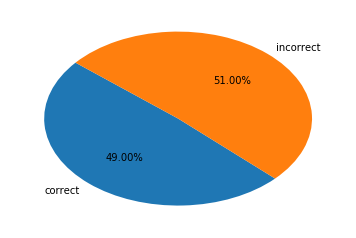

In [72]:
y = [c1+c2, inc1+inc2]
labels1 = tuple("correct_w1 correct_w2 incorrect_w1 incorrect_w2".split())
labels = tuple("correct incorrect".split())

plt.pie(y, labels=labels, autopct='%1.2f%%', shadow=False, startangle=140)

